In [10]:
import numpy as np
import scipy 
import os
import matplotlib as mlp
import matplotlib.pyplot as plt 



x_l = 0
x_r = 2*np.pi
y_l,y_r = x_l,x_r
def read(stderr_file):
    with open(stderr_file, "r") as err:
        stderr_content = err.read()
        # 在这里对 stderr_content 进行处理
        sss = stderr_content.split('\n')[3:-2]
        results = {'time': [],'iteration': [],'value': []}
        for line in sss:
            parts = line.strip().split()
            time = float(parts[1])
            iteration = int(parts[-2])
            value = float(parts[-1])
            results['time'].append(time)
            results['iteration'].append(1+iteration)
            results['value'].append(value)
    return results
def draw(p,N,T=1):
    result_file = f'./Order_%d/SineWave_T_{T}_N_%d.txt'%(p,N)
    rorder_file = f'./stdout_Diric4_%d_%d_1E8.txt'%(p,N)
    data = np.loadtxt(result_file)
    x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T
    idx = np.argsort(x)
    x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = \
        (val[idx] for val in (x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es))

    ph = 0.4*rh*(eh-0.5*uh**2-0.5*vh**2-0.5*wh**2)
    plt.figure(figsize=(7,3.2),dpi=200)

    plt.subplot(1,2,1)
    plt.tripcolor(x,y,ph,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.yticks(np.linspace(y_l,y_r,6))
    plt.yticks(np.linspace(y_l,y_r,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$E_h(t=\infty)$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.subplot(1,2,2)
    plt.tripcolor(x,y,rh-rs,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.yticks(np.linspace(y_l,y_r,6))
    plt.yticks(np.linspace(y_l,y_r,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$E_h(t=\infty)-E(t=\infty)$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.suptitle(r'Error of Density, $\|\rho_h-\rho\|/\|\rho\|$=%.2e'%(np.linalg.norm(rh-rs)/np.linalg.norm(rs)))
    plt.tight_layout()
    plt.show()

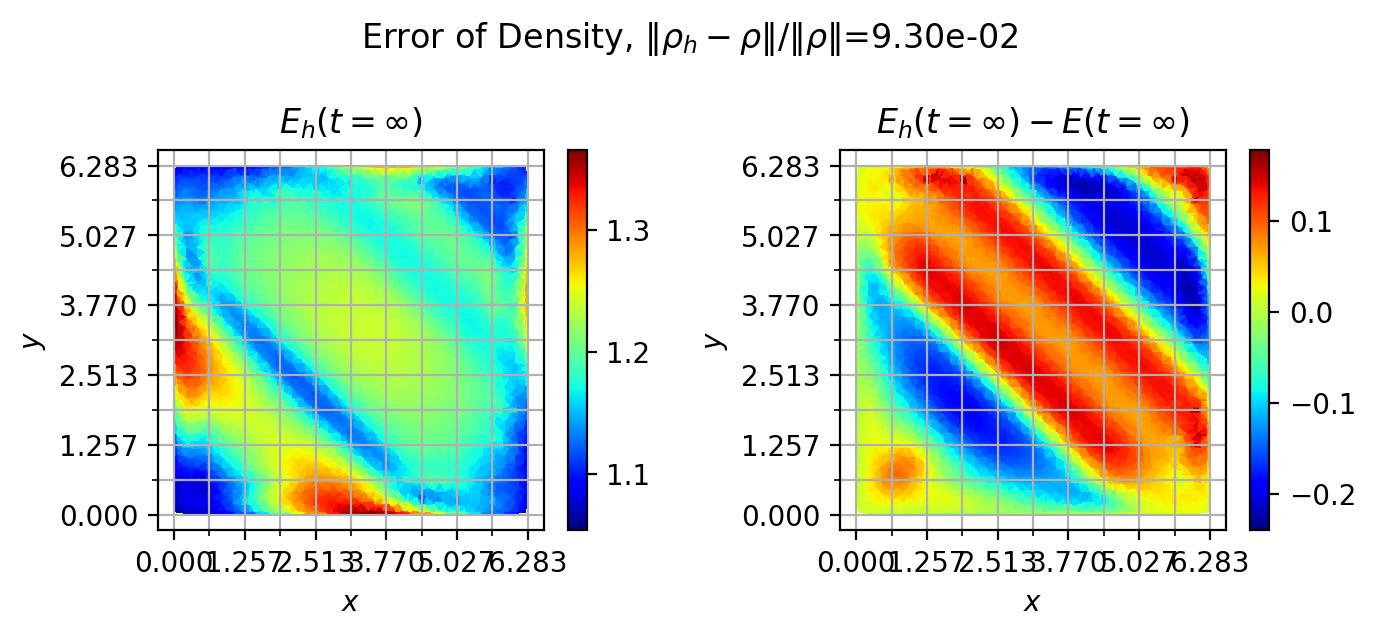

In [11]:
# NN = []
# VV = []
# T = 10
# p = 2
# for N in [10,15,20,25,30,40,60,80]:
#     result_file = f'./Order_%d/SineWave_T_{T}_N_%d.txt'%(p,N)
#     if not os.path.exists(result_file): continue
#     data = np.loadtxt(result_file)
#     x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T
#     idx = np.argsort(x)
#     x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = \
#         (val[idx] for val in (x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es))
#     NN.append(N)
#     VV.append(np.linalg.norm(rh-rs)/np.linalg.norm(rs))
# hh = 2*np.pi/np.array(NN)
# ee = np.array(VV)
# print(np.diff(np.log(ee))/np.diff(np.log(hh)))

draw(2,10,10)


[1.99654176 2.9845358 ]


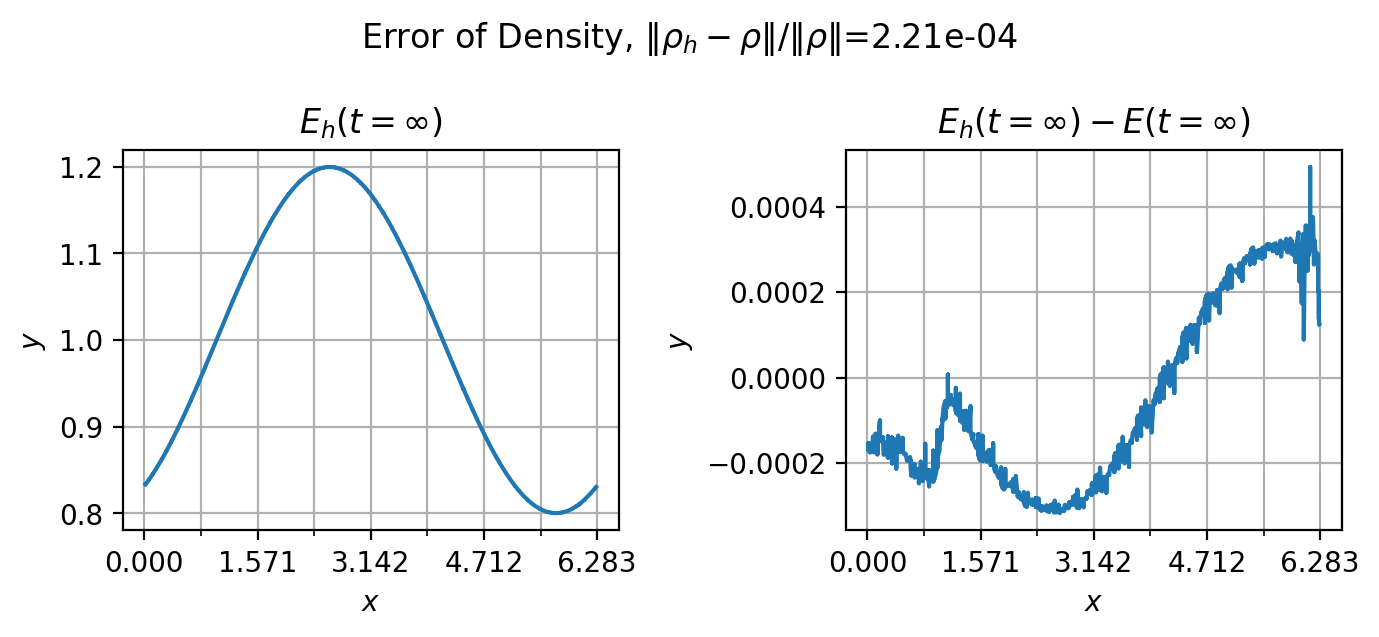

In [75]:
NN = []
VV = []
T = 10
p = 2
for N in [5,10,20,40]:
    result_file = f'./Order_%d/rho_T_{T}_N_%d.txt'%(p,N)
    if not os.path.exists(result_file): continue
    data = np.loadtxt(result_file)
    x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T
    idx = np.argsort(x)
    x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = \
        (val[idx] for val in (x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es))
    NN.append(N)
    VV.append(np.linalg.norm(rh-rs)/np.linalg.norm(rs))
hh = 2*np.pi/np.array(NN)
ee = np.array(VV)
print(np.diff(np.log(ee))/np.diff(np.log(hh)))

draw(p,20,T)


[1.71779249 1.92932959 1.99632131]


In [30]:
0.00695526/0.00106812

6.511684080440399

In [31]:
0.000327052/2.51948e-05

12.980932573388158

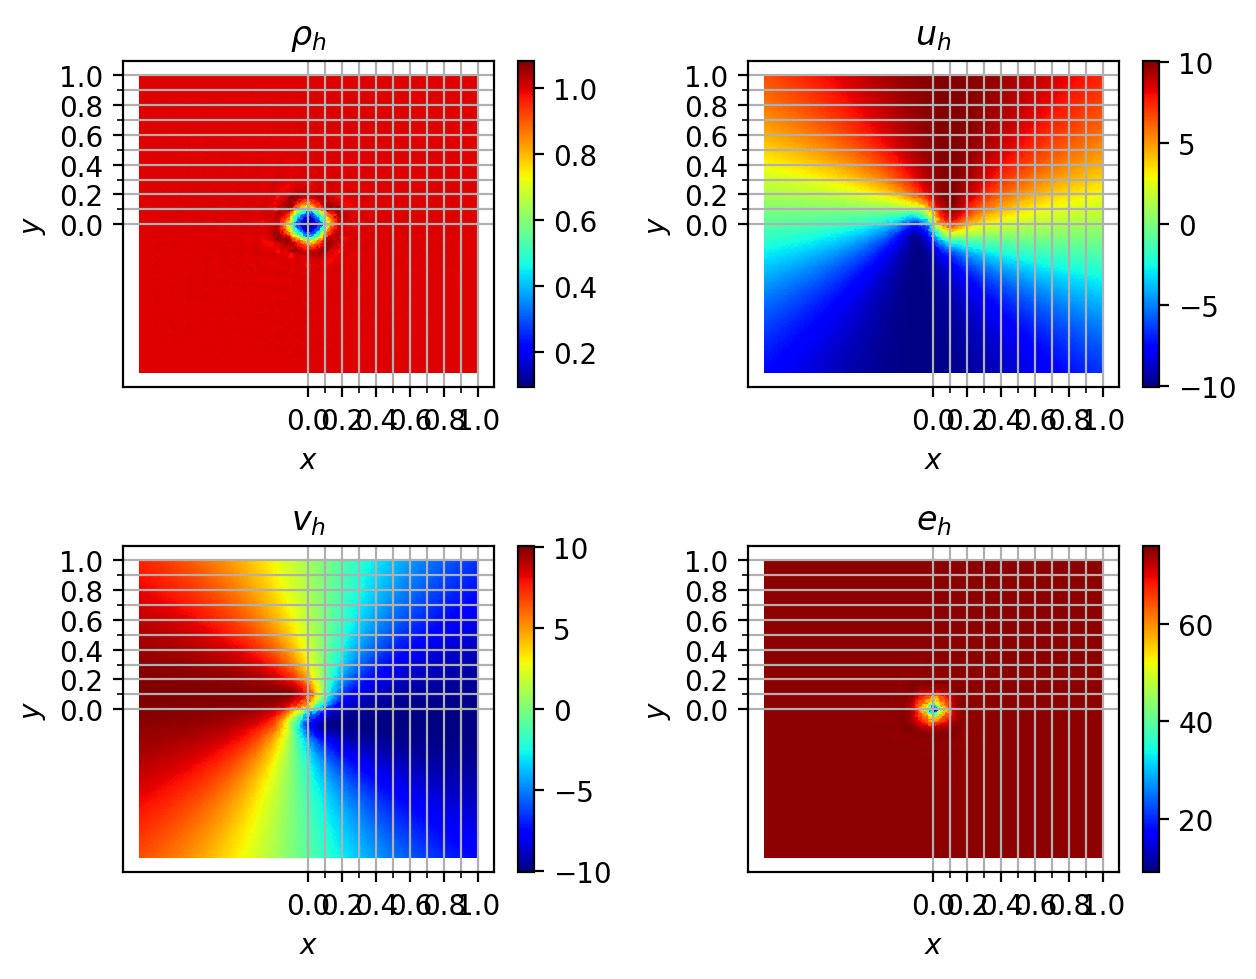

In [28]:
import numpy as np
import scipy 
import os
import matplotlib as mlp
import matplotlib.pyplot as plt 



x_l = 0
x_r = 1
y_l,y_r = x_l,x_r
def read(stderr_file):
    with open(stderr_file, "r") as err:
        stderr_content = err.read()
        # 在这里对 stderr_content 进行处理
        sss = stderr_content.split('\n')[3:-2]
        results = {'time': [],'iteration': [],'value': []}
        for line in sss:
            parts = line.strip().split()
            time = float(parts[1])
            iteration = int(parts[-2])
            value = float(parts[-1])
            results['time'].append(time)
            results['iteration'].append(1+iteration)
            results['value'].append(value)
    return results
def draw(p,N,T=1):
    result_file = f'./Order_%d/Riemann_T_{T}_N_%d.txt'%(p,N)
    rorder_file = f'./stdout_Diric4_%d_%d_1E8.txt'%(p,N)
    data = np.loadtxt(result_file)
    x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T
    idx = np.argsort(x)
    x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = \
        (val[idx] for val in (x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es))
    # idx = (np.abs(y-0.5/N)<0.08/N)*(np.abs(z-0.5/N)<0.08/N)
    # x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = \
    #     (val[idx] for val in (x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es))

    ph = 0.4*rh*(eh-0.5*uh**2-0.5*vh**2-0.5*wh**2)

    plt.figure(figsize=(6.4,5),dpi=200)

    plt.subplot(2,2,1)
    plt.tripcolor(x,y,rh,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.yticks(np.linspace(y_l,y_r,6))
    plt.yticks(np.linspace(y_l,y_r,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$\rho_h$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.subplot(2,2,2)
    plt.tripcolor(x,y,uh,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.yticks(np.linspace(y_l,y_r,6))
    plt.yticks(np.linspace(y_l,y_r,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$u_h$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.subplot(2,2,3)
    plt.tripcolor(x,y,vh,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.yticks(np.linspace(y_l,y_r,6))
    plt.yticks(np.linspace(y_l,y_r,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$v_h$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.subplot(2,2,4)
    plt.tripcolor(x,y,eh,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.yticks(np.linspace(y_l,y_r,6))
    plt.yticks(np.linspace(y_l,y_r,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$e_h$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    # plt.suptitle(r'Error of Density, $\|\rho_h-\rho\|/\|\rho\|$=%.2e'%(np.linalg.norm(rh-rs)/np.linalg.norm(rs)))
    plt.tight_layout()
    plt.show()

draw(1,20,2)

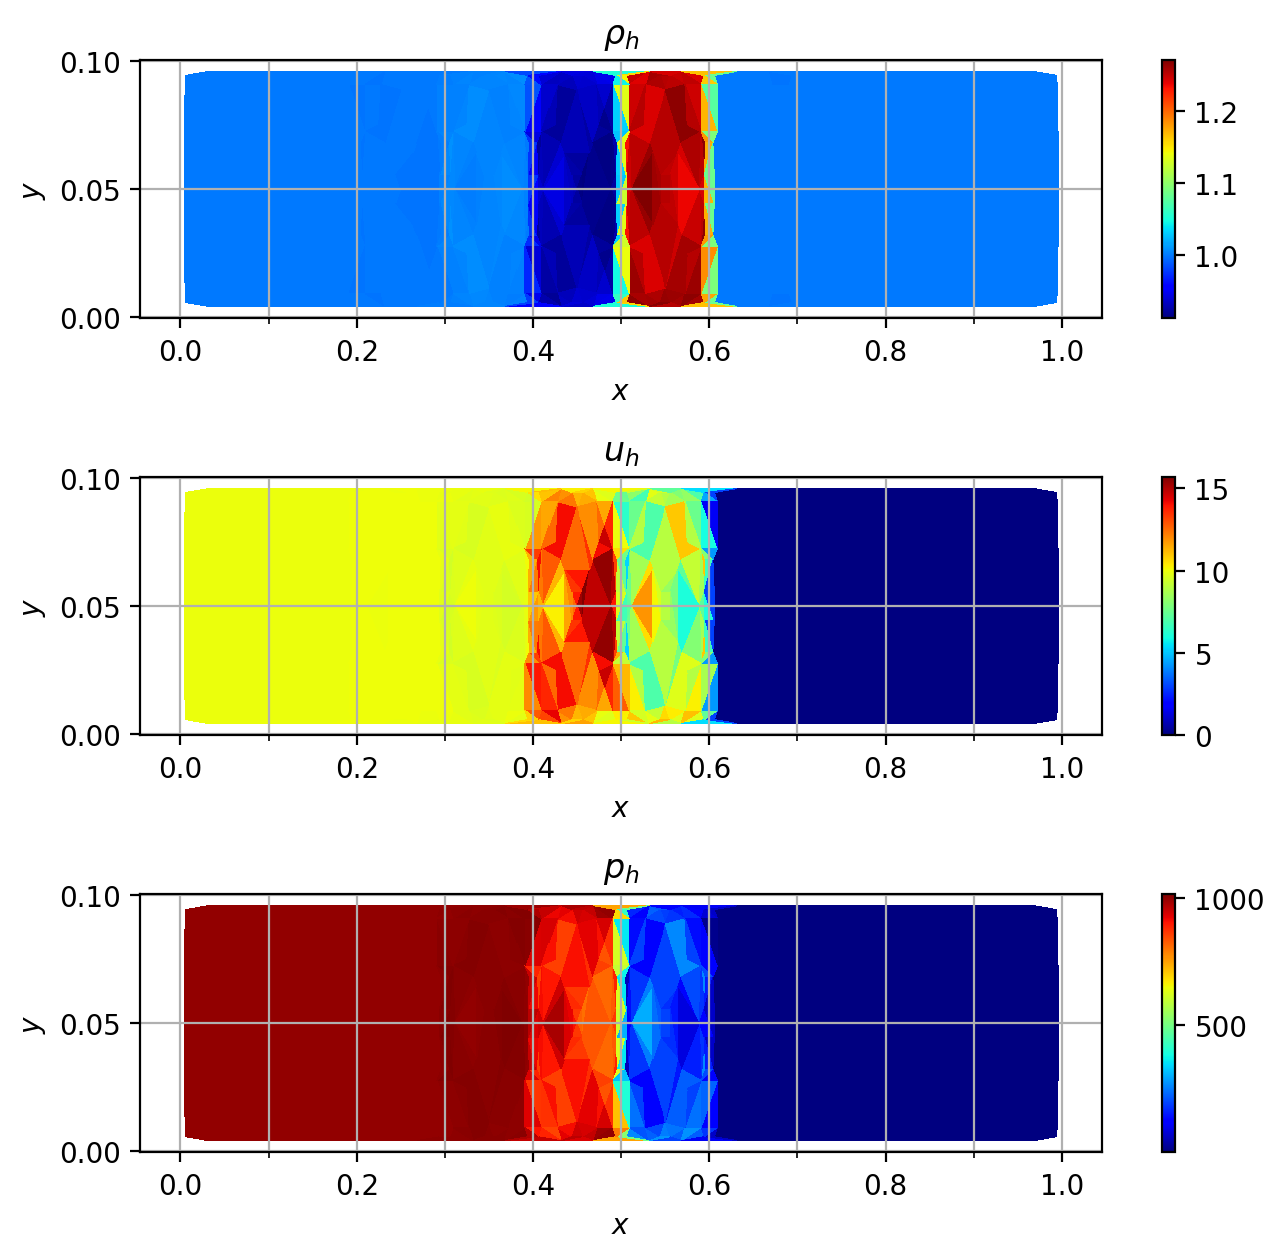

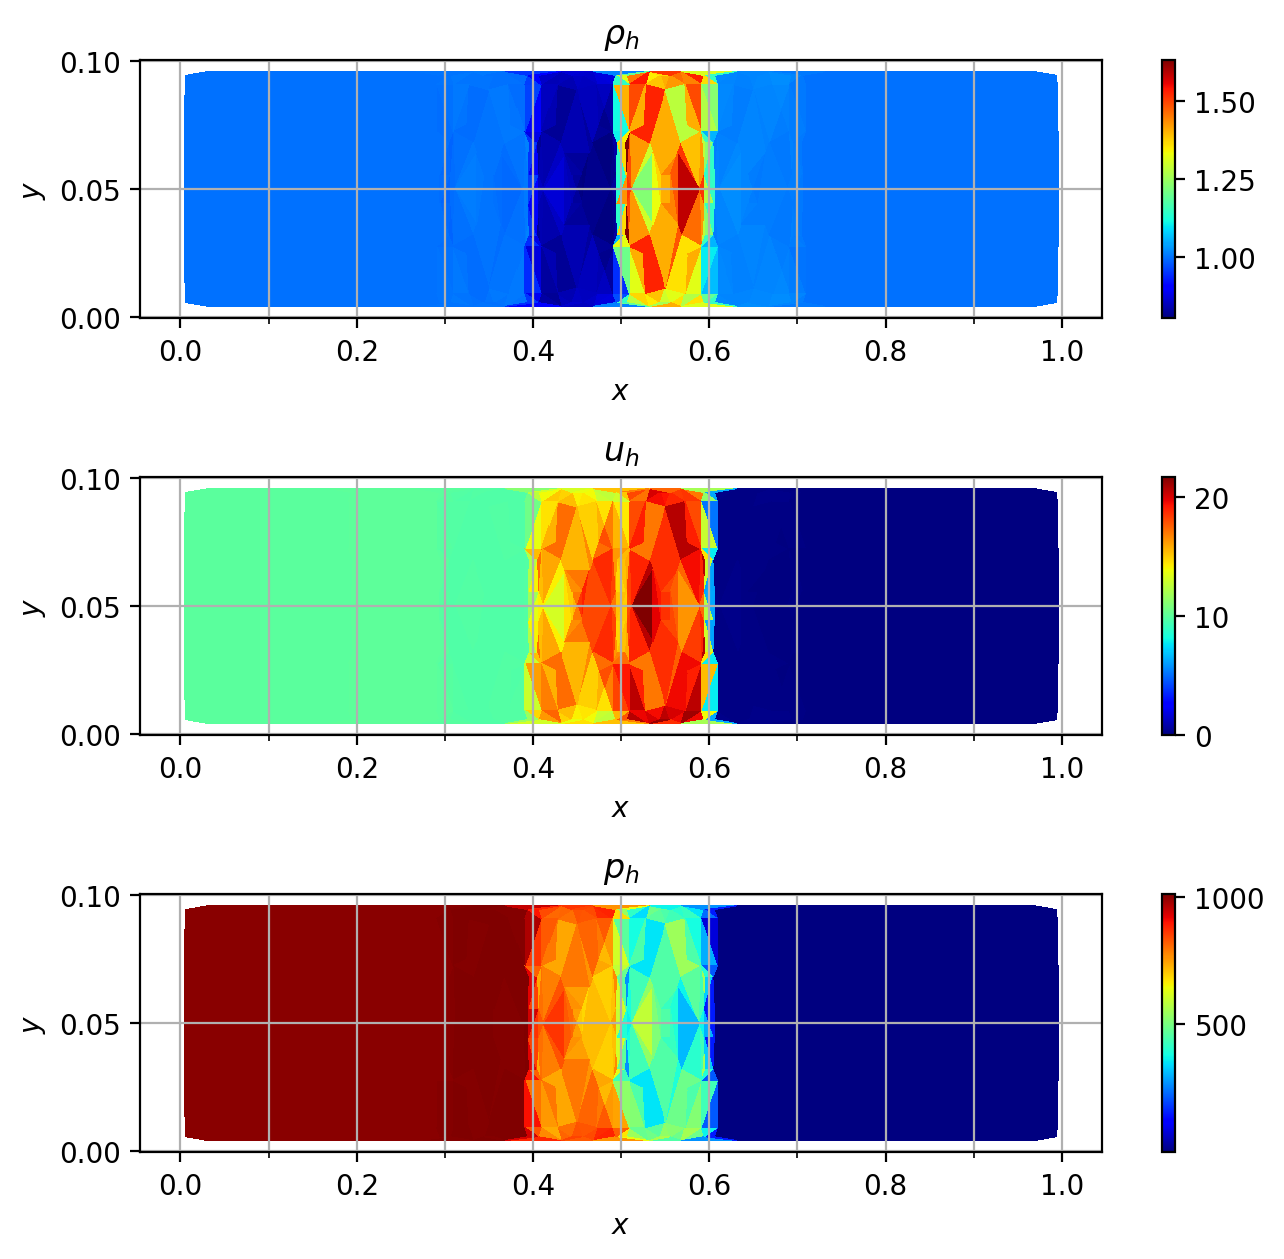

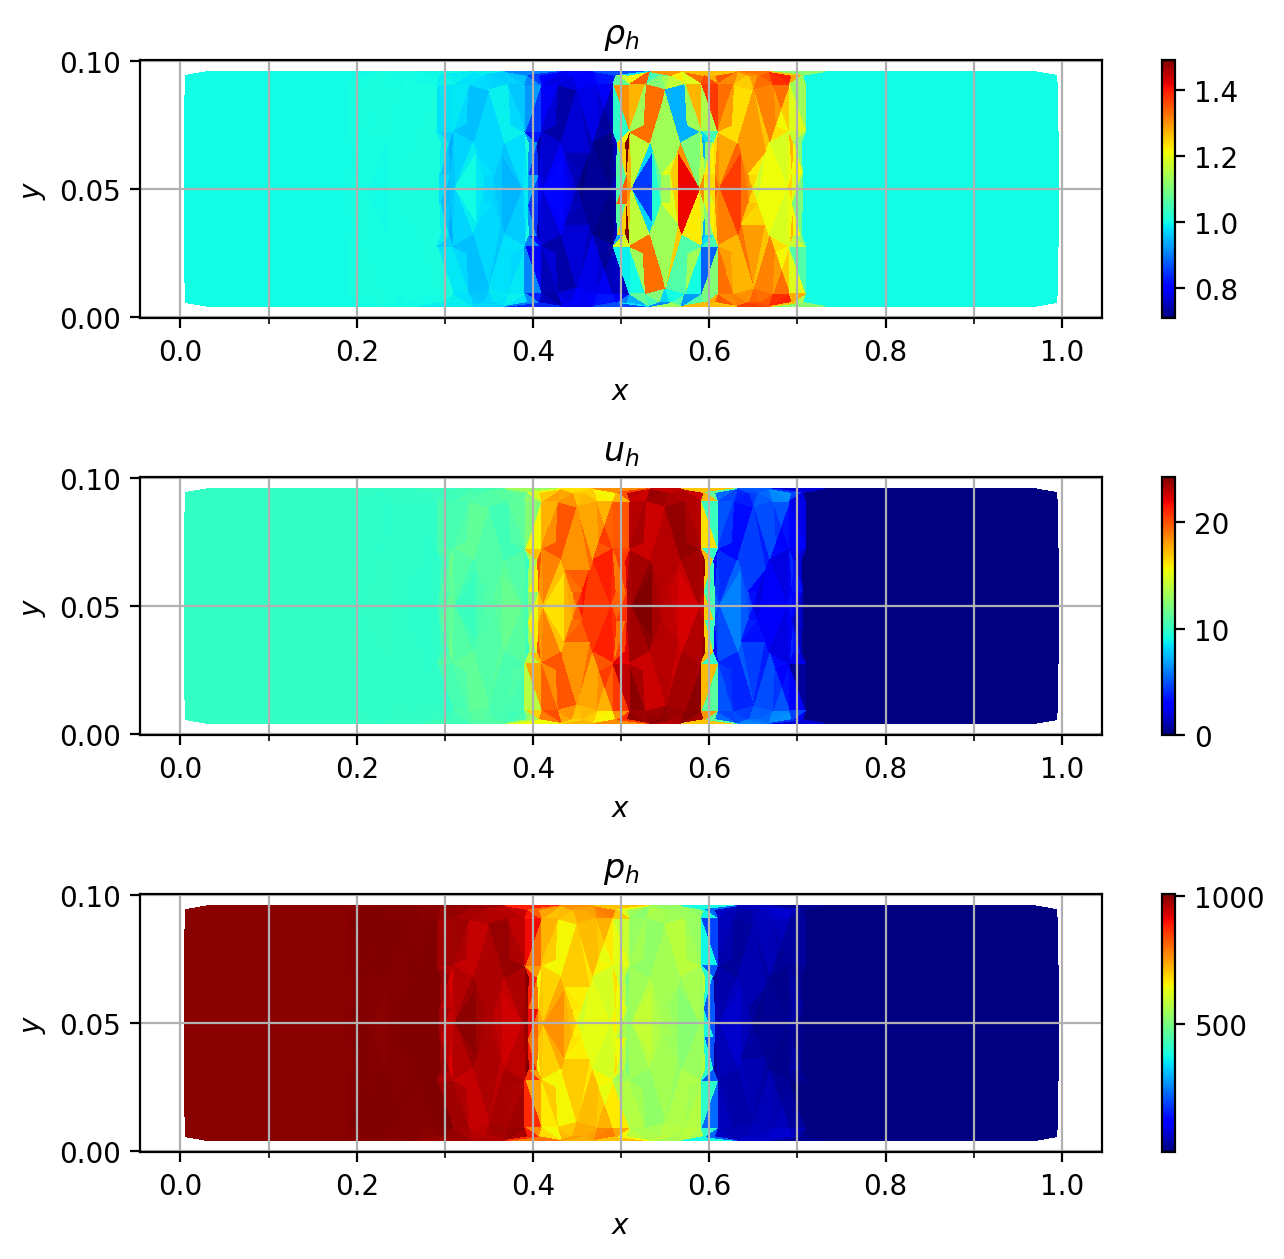

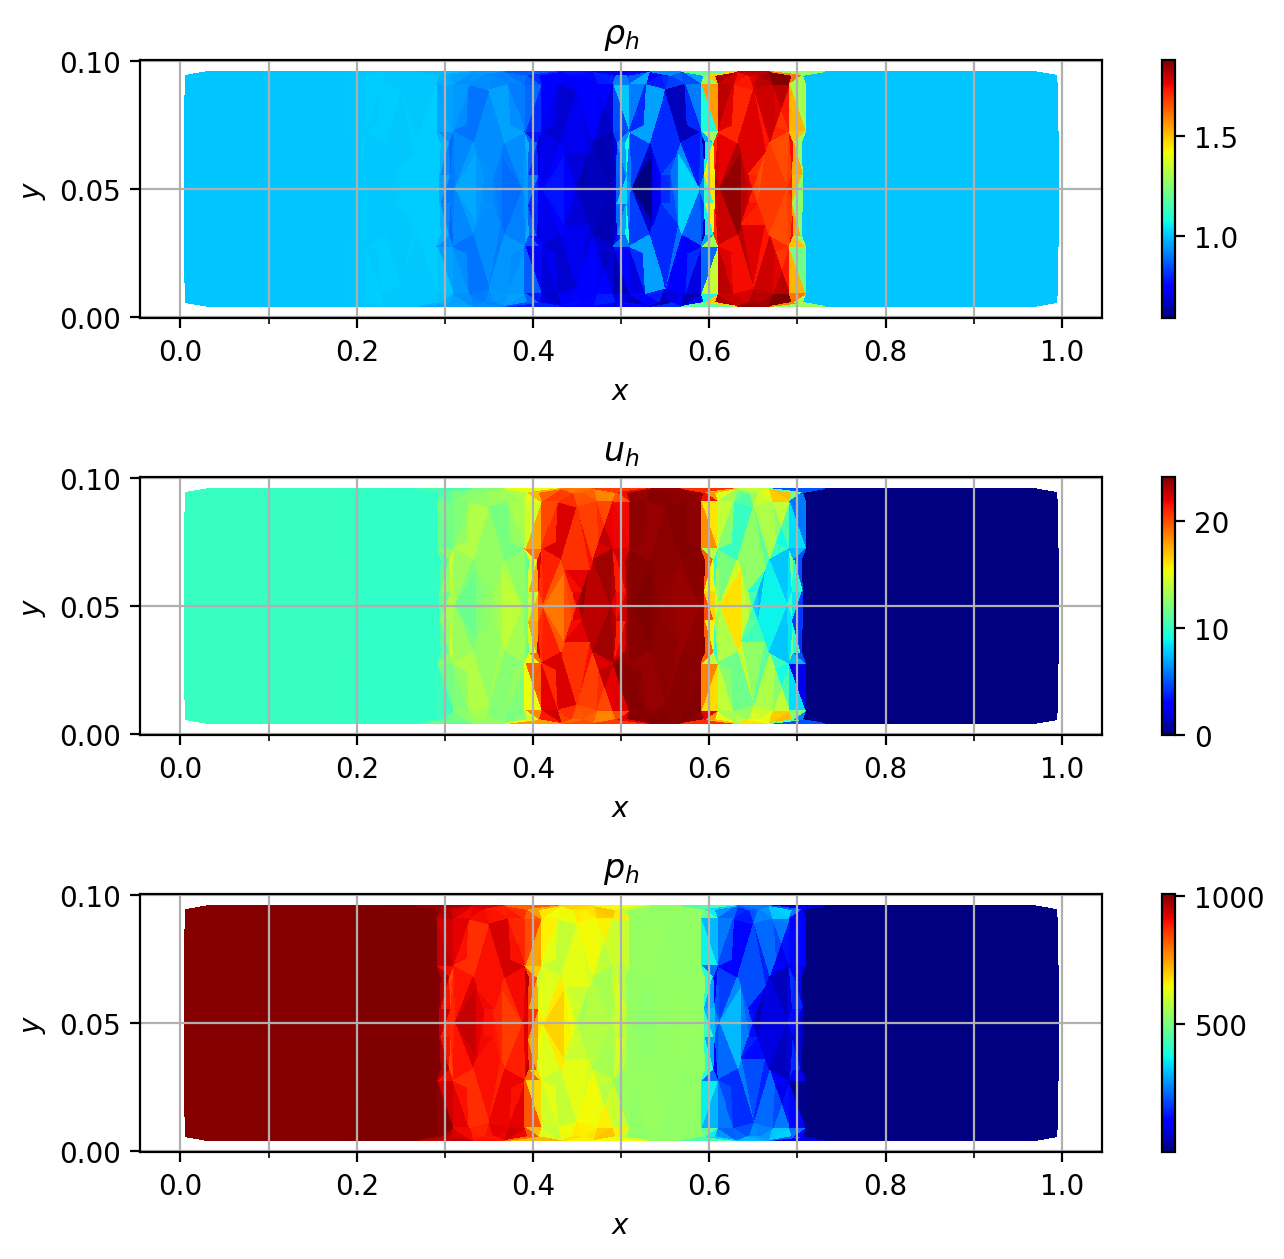

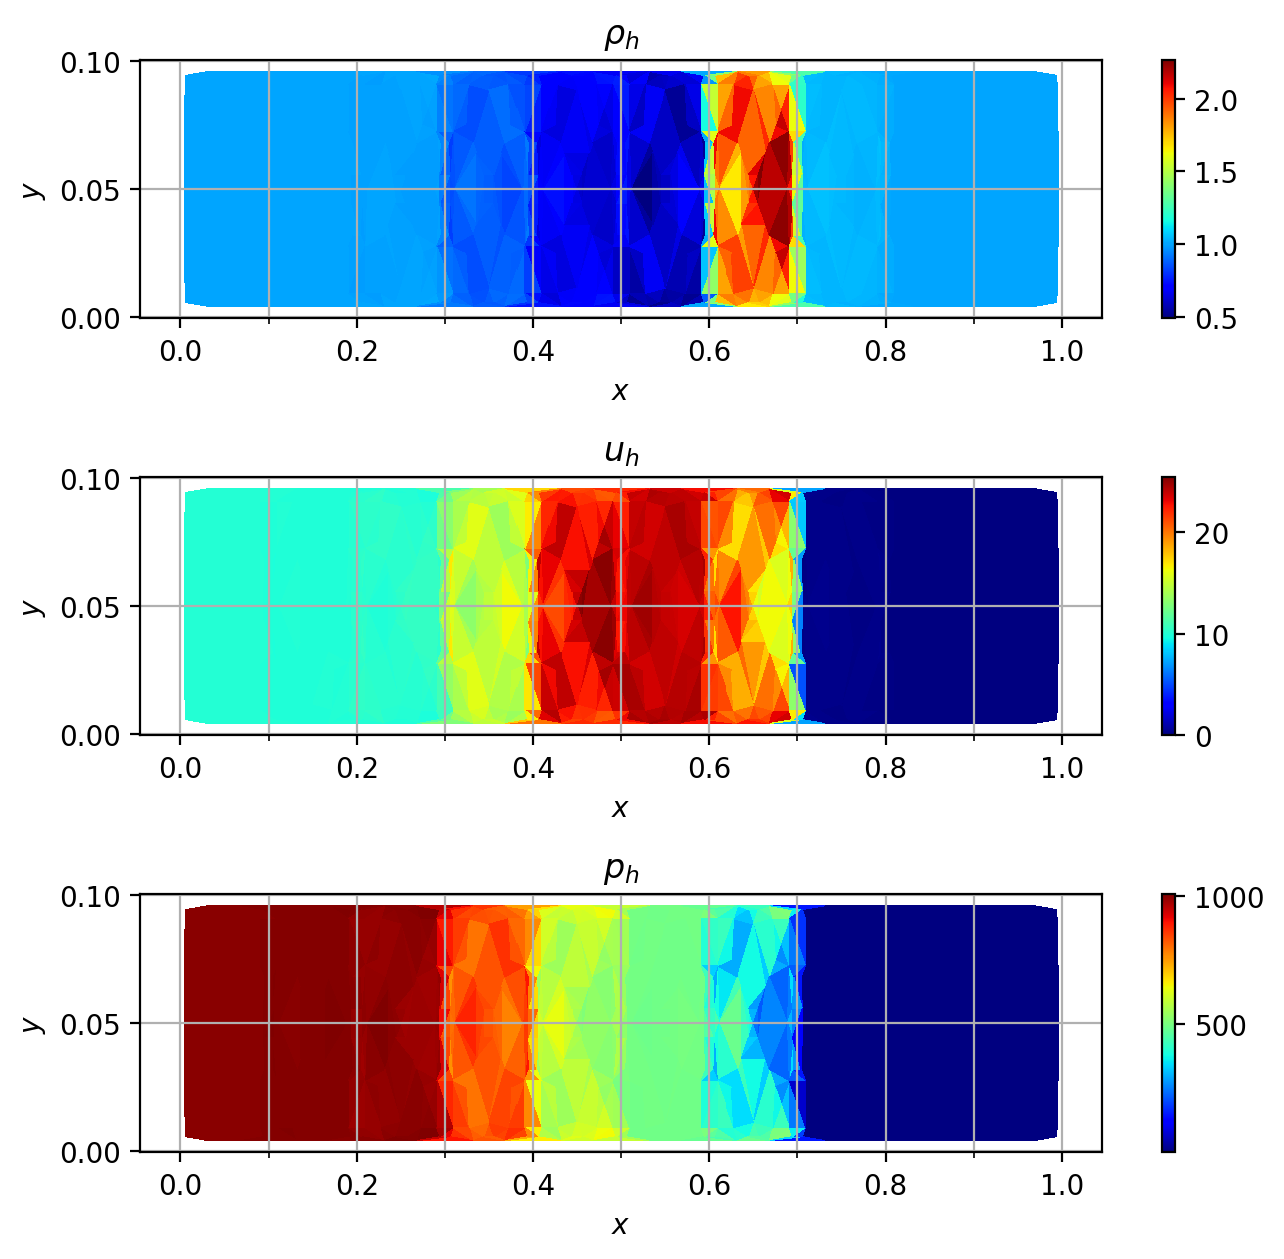

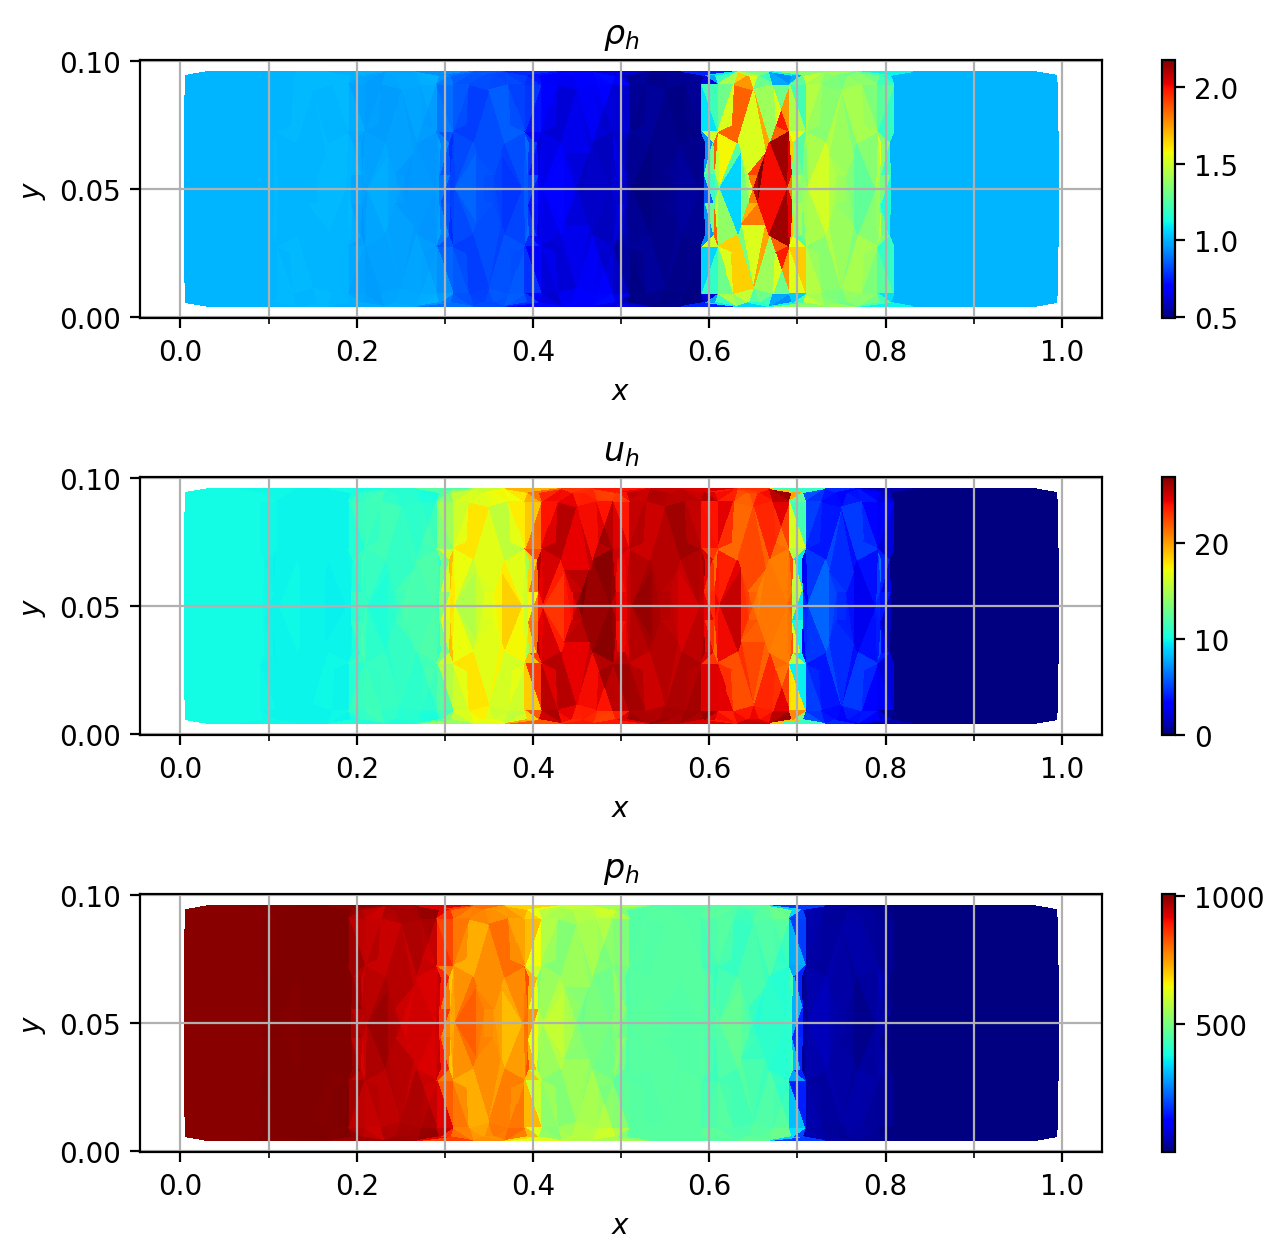

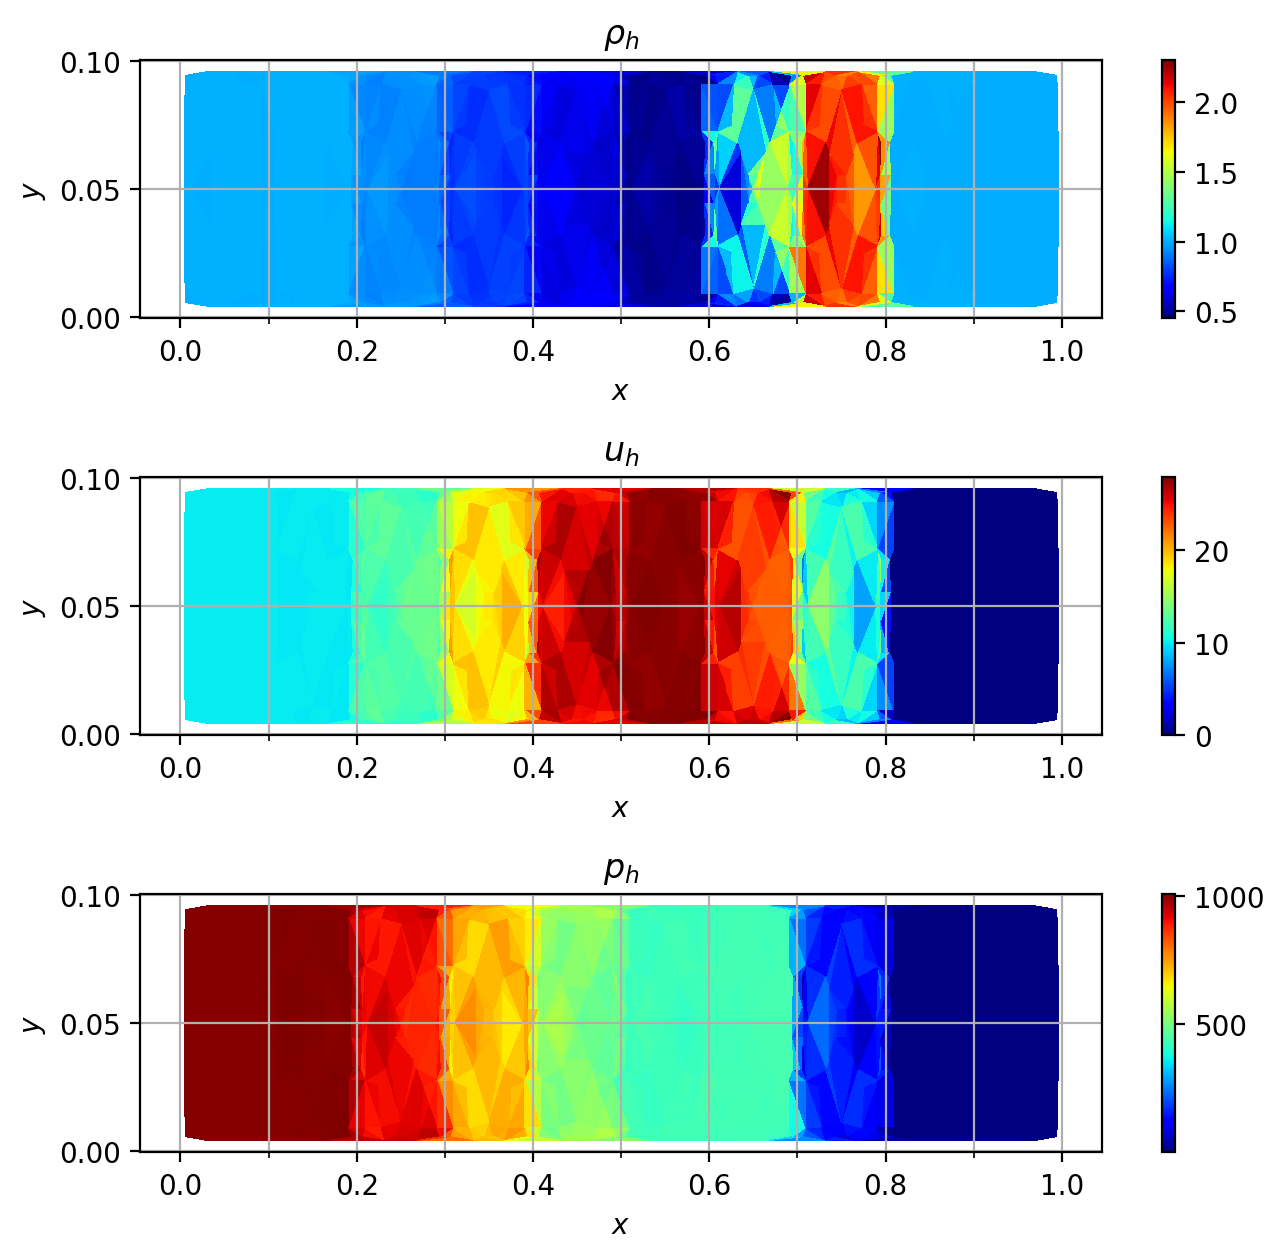

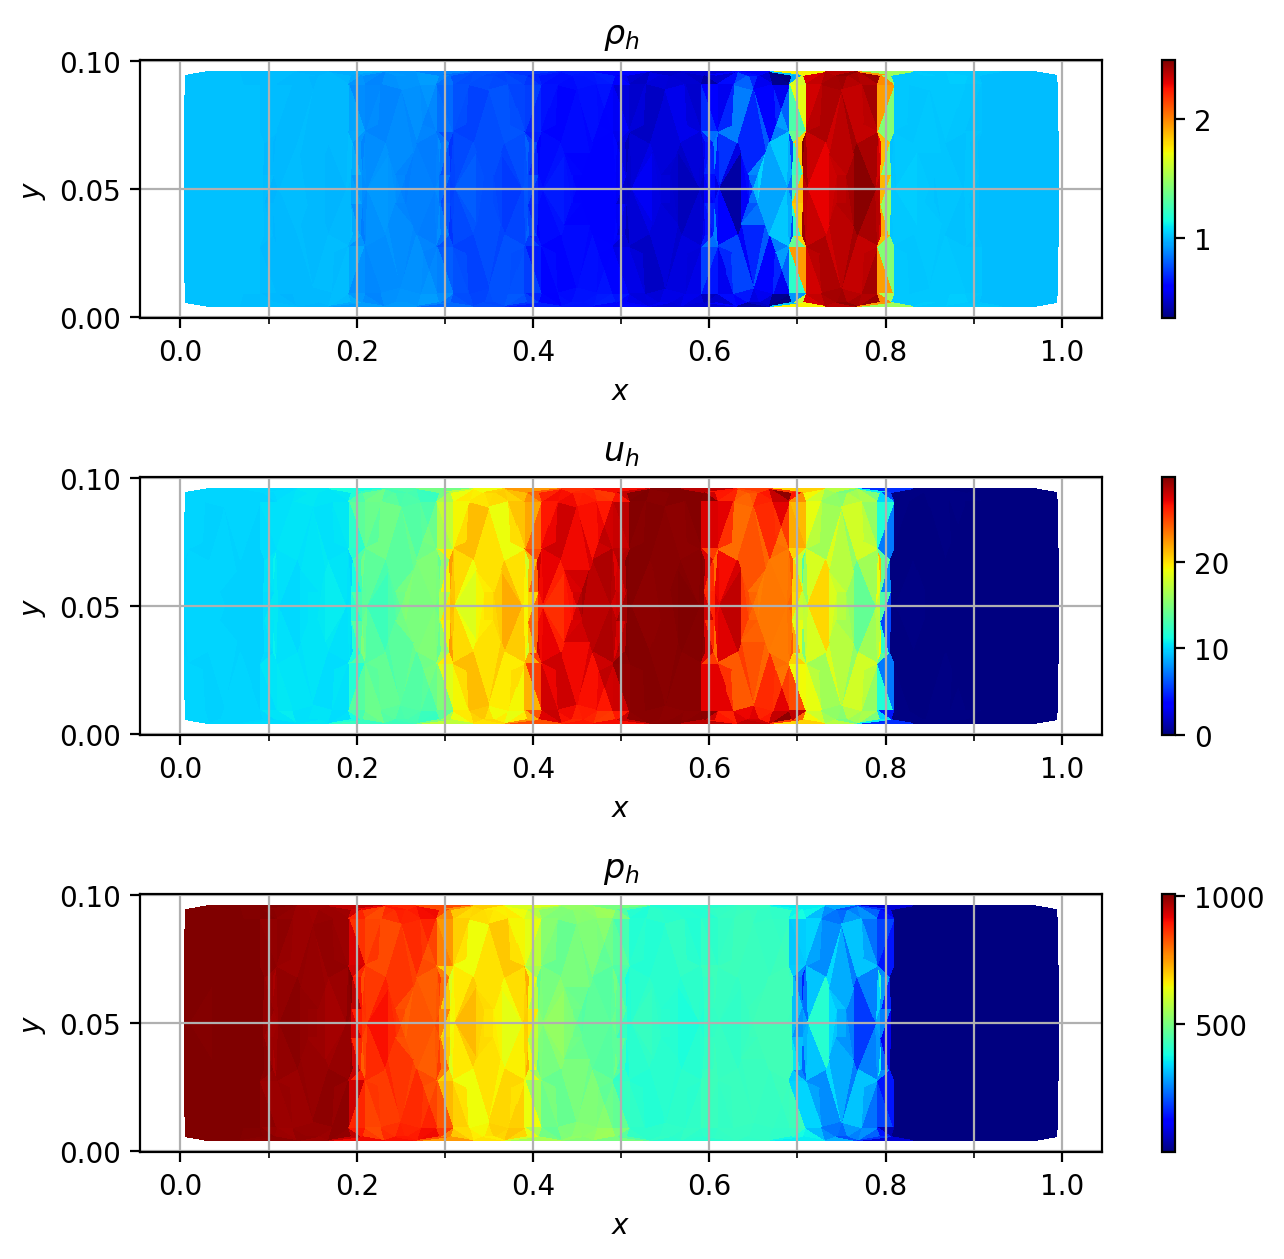

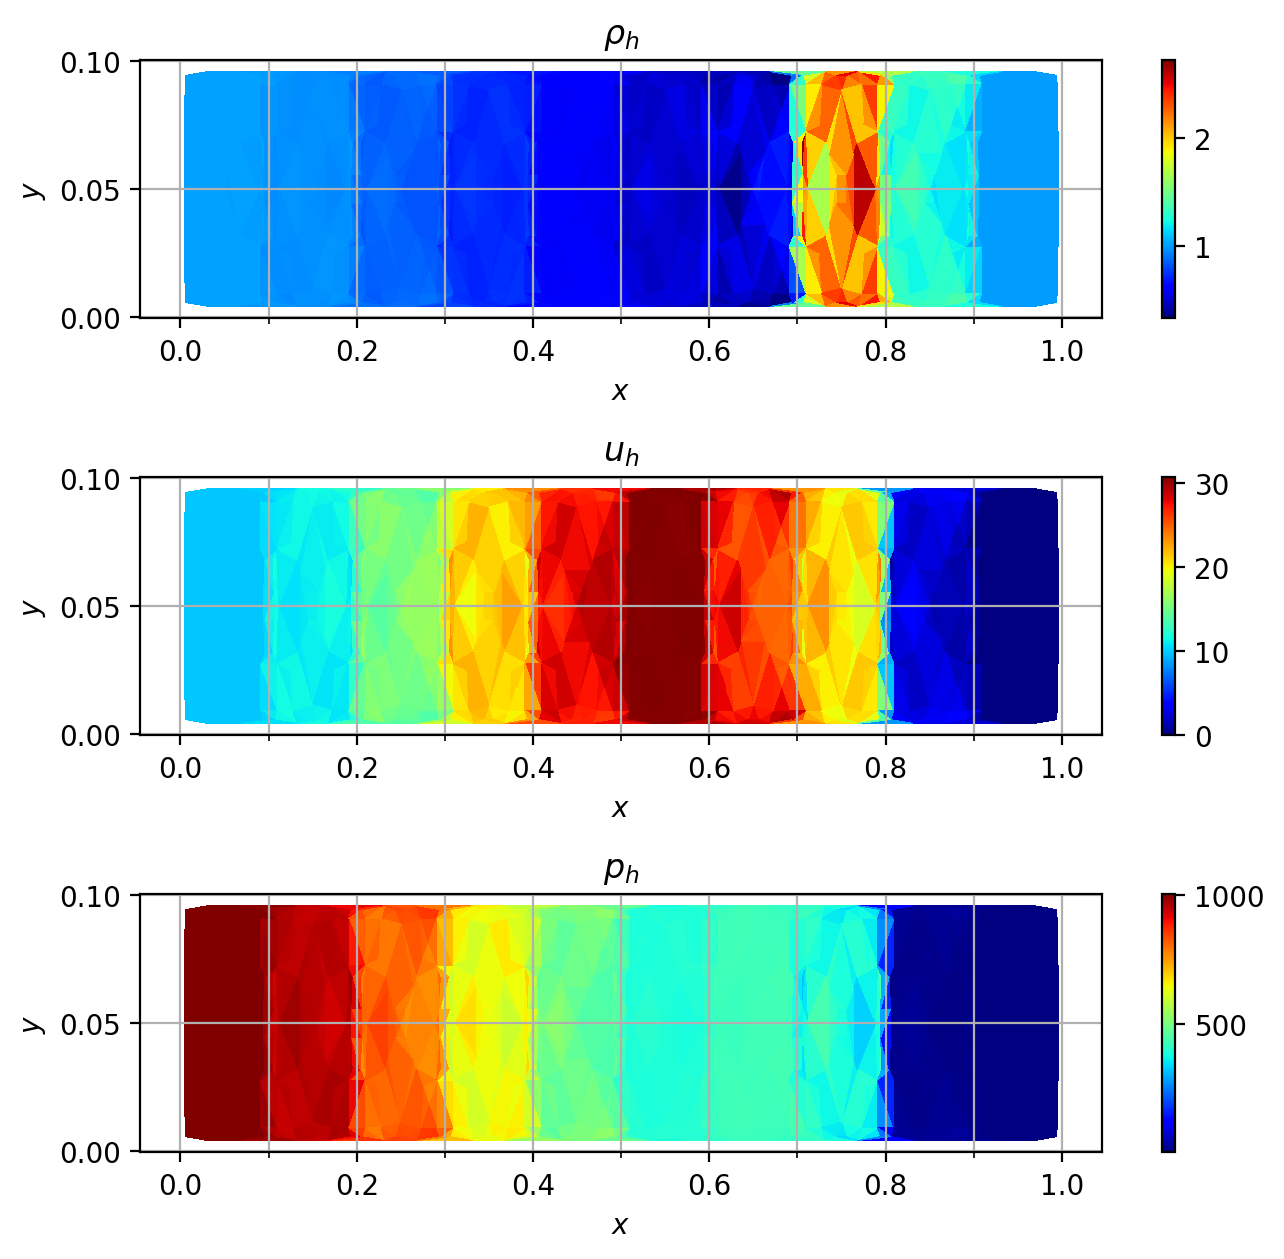

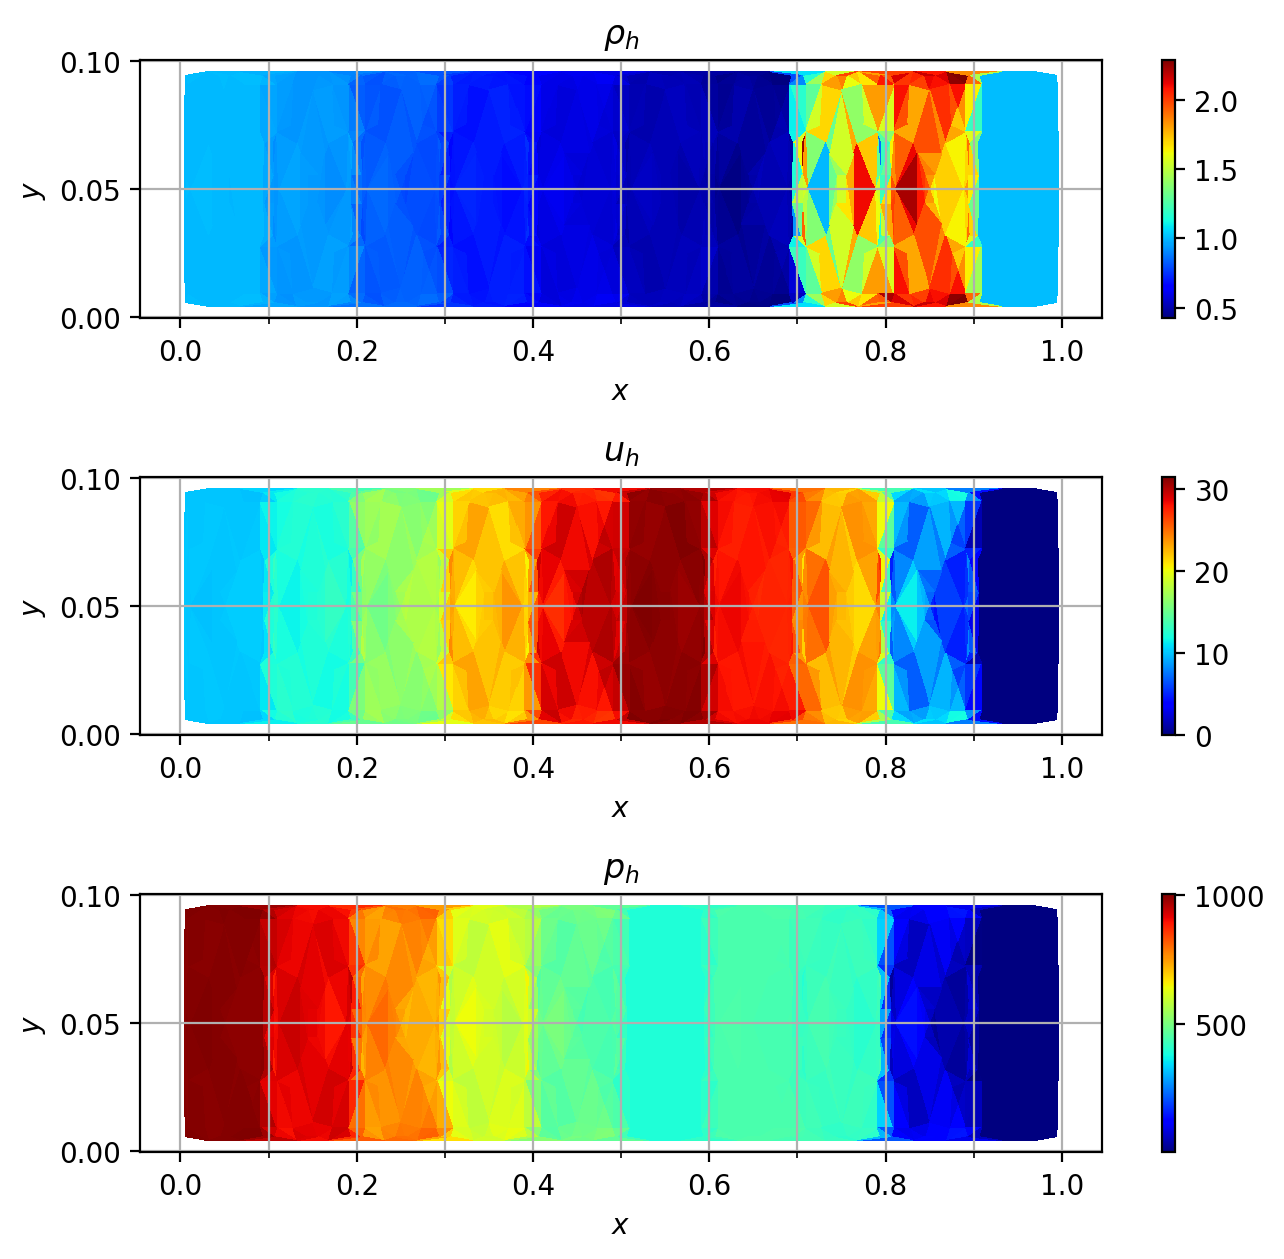

In [3]:
y_l,y_r = x_l,x_r
def draw(p,N,T=1):
    result_file = f'./Order_%d/Riemann_T_{T}_N_%d.txt'%(p,N)
    rorder_file = f'./stdout_Diric4_%d_%d_1E8.txt'%(p,N)
    data = np.loadtxt(result_file)
    x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T

    plt.figure(figsize=(7,6.4),dpi=200)

    plt.subplot(3,1,1)
    plt.tripcolor(x,y,rh,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$\rho_h$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.subplot(3,1,2)
    plt.tripcolor(x,y,uh,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$u_h$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.subplot(3,1,3)
    plt.tripcolor(x,y,0.4*rh*(eh-0.5*uh**2),cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$p_h$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')


    # plt.suptitle(r'Error of Energy, $\|E_h-E\|/\|E\|$=%.2e'%(np.loadtxt(rorder_file)[5]))
    plt.tight_layout()
    plt.show()
for T in range(10):
    draw(1,10,T+1)

In [80]:
import subprocess
import time

start = time.time()
N_list = [10,20]
left = 0
right = len(N_list)
p = 1
for k,N in enumerate(N_list[left:right]):
    # 定义输出文件路径
    stdout_file = f"./stdout_Diric4_%d_%d_1E8.txt"%(p,N)
    stderr_file = f"./stderr_Diric4_%d_%d_1E8.txt"%(p,N)

    # 构造命令
    command = f"./SedovBatch3 {p} {N}"

    # 执行命令并捕获输出
    with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
        process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
        process.wait()  # 等待进程完成


    draw(p,N)
    result = {}
    NN = []
    EE = []
    for N in N_list[:(left+k+1)]:
        # result[N] = read(stderr_file)
        NN.append(N)
        EE.append(np.loadtxt(f"./stdout_Diric4_%d_%d_1E8.txt"%(p,N))[5])
    print(time.time()-start,NN,EE)
    if(len(NN)>1):
        print(np.diff(np.log(np.array(EE)))/np.diff(np.log(np.array(NN))))



KeyboardInterrupt



In [ ]:
import subprocess
import time

start = time.time()
N_list = [3,4,5,6,8,10,12,]
left = 0
right = len(N_list)
p = 2
for k,N in enumerate(N_list[left:right]):
    # 定义输出文件路径
    stdout_file = f"./stdout_Diric4_%d_%d_1E8.txt"%(p,N)
    stderr_file = f"./stderr_Diric4_%d_%d_1E8.txt"%(p,N)

    # 构造命令
    command = f"./SedovBatch3 {p} {N}"

    # 执行命令并捕获输出
    with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
        process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
        process.wait()  # 等待进程完成


    draw(p,N)
    result = {}
    NN = []
    EE = []
    for N in N_list[:(left+k+1)]:
        # result[N] = read(stderr_file)
        NN.append(N)
        EE.append(np.loadtxt(f"./stdout_Diric4_%d_%d_1E8.txt"%(p,N))[5])
    print(time.time()-start,NN,EE)
    if(len(NN)>1):
        print(np.diff(np.log(np.array(EE)))/np.diff(np.log(np.array(NN))))



In [ ]:
import subprocess
import time

start = time.time()
N_list = [3,4,5,6,8,]
left = 0
right = len(N_list)
p = 3
for k,N in enumerate(N_list[left:right]):
    # 定义输出文件路径
    stdout_file = f"./stdout_Diric4_%d_%d_1E8.txt"%(p,N)
    stderr_file = f"./stderr_Diric4_%d_%d_1E8.txt"%(p,N)

    # 构造命令
    command = f"./SedovBatch3 {p} {N}"

    # 执行命令并捕获输出
    with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
        process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
        process.wait()  # 等待进程完成


    draw(p,N)
    result = {}
    NN = []
    EE = []
    for N in N_list[:(left+k+1)]:
        # result[N] = read(stderr_file)
        NN.append(N)
        EE.append(np.loadtxt(f"./stdout_Diric4_%d_%d_1E8.txt"%(p,N))[5])
    print(time.time()-start,NN,EE)
    if(len(NN)>1):
        print(np.diff(np.log(np.array(EE)))/np.diff(np.log(np.array(NN))))



In [ ]:
import subprocess
import time

start = time.time()
N_list = [3,4,5,]
left = 0
right = len(N_list)
p = 4
for k,N in enumerate(N_list[left:right]):
    # 定义输出文件路径
    stdout_file = f"./stdout_Diric4_%d_%d_1E8.txt"%(p,N)
    stderr_file = f"./stderr_Diric4_%d_%d_1E8.txt"%(p,N)

    # 构造命令
    command = f"./SedovBatch3 {p} {N}"

    # 执行命令并捕获输出
    with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
        process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
        process.wait()  # 等待进程完成


    draw(p,N)
    result = {}
    NN = []
    EE = []
    for N in N_list[:(left+k+1)]:
        # result[N] = read(stderr_file)
        NN.append(N)
        EE.append(np.loadtxt(f"./stdout_Diric4_%d_%d_1E8.txt"%(p,N))[5])
    print(time.time()-start,NN,EE)
    if(len(NN)>1):
        print(np.diff(np.log(np.array(EE)))/np.diff(np.log(np.array(NN))))



In [ ]:
import numpy as np
import scipy 
import matplotlib as mlp
import matplotlib.pyplot as plt 
import os


plt.figure(figsize=(10,4),dpi=200)
plt.suptitle('SIP and NIP  with  Picard  rel. tol = 1e-8')
plt.subplot(1,2,1)
plt.title('SIP')
for p in range(3):
    p = p+1
    NN = []
    EE = []
    for N in range(30):
        filename = f'./stdout_Diric4_%d_%d_1E8.txt'
        if not os.path.exists(filename): continue
        data = np.loadtxt(filename)
        if(len(data)==0): continue
        err = data[5]
        NN.append(N)
        EE.append(err)
    h = 1/np.array(NN)
    error = np.array(EE)
    order = np.diff(np.log(error))/np.diff(np.log(h))
    plt.loglog(h,error,'o-',label='p=%d'%(p))
    gm = lambda x: (x[1:]*x[:-1])**0.5
    for x,y,o in zip(gm(h),gm(error),order):
        plt.text(x,y,o.round(2))
plt.xlabel(r'$h$')
plt.xticks([],minor=True)
plt.xticks([1/v for v in [3,5,8,12,20]],['1/%d'%v for v in [3,5,8,12,20]])
plt.ylabel(r'$\|E_h-E\|/\|E\|$')
plt.grid()
plt.subplot(1,2,2)
plt.title('SIP')
for p in range(3):
    p = p+1
    NN = []
    EE = []
    for N in range(30):
        filename = f'./logging_Diric4_{p}_{N}_SIP_1E8_stdout.txt'
        if not os.path.exists(filename): continue
        data = np.loadtxt(filename)
        if(len(data)==0): continue
        err = data[5]
        NN.append(N)
        EE.append(err)
    h = 1/np.array(NN)
    error = np.array(EE)
    order = np.diff(np.log(error))/np.diff(np.log(h))
    plt.loglog(h,error,'o-',label='p=%d'%(p))
    gm = lambda x: (x[1:]*x[:-1])**0.5
    for x,y,o in zip(gm(h),gm(error),order):
        plt.text(x,y,o.round(2))

plt.xlabel(r'$h$')
plt.xticks([],minor=True)
plt.xticks([1/v for v in [3,5,8,12,20]],['1/%d'%v for v in [3,5,8,12,20]])
plt.ylabel(r'$\|E_h-E\|/\|E\|$')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
p = 2
N = 8
result_file = f'./Order_%d/rho_T_1_N_%d.txt'%(p,N)
rorder_file = f'./logging_Diric4_%d_%d_SIP2_1E8_stdout.txt'%(p,N)
data = np.loadtxt(result_file)
x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T

plt.figure(figsize=(7,3.2),dpi=200)

plt.subplot(1,2,1)
plt.tripcolor(x,y,eh,cmap='jet')
plt.colorbar()
plt.xticks(np.linspace(0,1,6))
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,1,11),minor=True)
plt.yticks(np.linspace(0,1,11),minor=True)
plt.grid(which='both')
plt.title(r'$E_h(t=\infty)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.subplot(1,2,2)
plt.tripcolor(x,y,eh-es,cmap='jet')
plt.colorbar()
plt.xticks(np.linspace(0,1,6))
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,1,11),minor=True)
plt.yticks(np.linspace(0,1,11),minor=True)
plt.grid(which='both')
plt.title(r'$E_h(t=\infty)-E(t=\infty)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.suptitle(r'Error of Energy, $\|E_h-E\|/\|E\|$=%.2e'%(
np.loadtxt(rorder_file)[5]))
plt.tight_layout()
plt.show()

In [ ]:
for p in range(3):
    p = p+1
    NN = []
    EE = []
    for N in range(30):
        filename = f'./logging_Diric4_{p}_{N}_rel1E8_stdout.txt'
        if os.path.exists(filename): 
            os.rename(f'./logging_Diric4_{p}_{N}_rel1E8_stdout.txt',f'./logging_Diric4_{p}_{N}_NIP_1E8_stdout.txt')
            os.rename(f'./logging_Diric4_{p}_{N}_rel1E8_stderr.txt',f'./logging_Diric4_{p}_{N}_NIP_1E8_stderr.txt')
        